# Scaler Data Analysis

# Approach
- Basic Data Analysis
- Data Preprocessing
    - Data Cleaning
    - Data Transformation
    - Handling missing values
- Exploratory Data Analysis
    - Univariate, Bivariate, Multivariate Analysis
    - Target vs Features
- Statistical Tests
    - Chisquare, Anova Test
- Modeling
- Assumptions of Linear Regression

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import scipy.stats as stats
np.set_printoptions(suppress=True)
from sklearn.decomposition import PCA
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder, RobustScaler, OrdinalEncoder
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, precision_recall_curve, auc

bold_start = '\033[1m'
bold_end = '\033[0m'

In [2]:
# raw_data = pd.read_csv(r"F:\Muthu_2023\Personal\NextStep\DSCourse\Scaler\Business-Case-Study\Scaler\Dataset\scaler_clustering.csv")
raw_data = pd.read_csv(r"E:\Nextstep\Scaler\Business-Case-Study\Scaler\Dataset\scaler_clustering.csv")
raw_data.head()

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0


# Data Analysis

In [5]:
print("Number of rows in the dataset: ", len(raw_data))
raw_data.info()

Number of rows in the dataset:  205843
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205843 entries, 0 to 205842
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        205843 non-null  int64  
 1   company_hash      205799 non-null  object 
 2   email_hash        205843 non-null  object 
 3   orgyear           205757 non-null  float64
 4   ctc               205843 non-null  int64  
 5   job_position      153281 non-null  object 
 6   ctc_updated_year  205843 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 11.0+ MB


In [5]:
raw_data.describe()

,Unnamed: 0,orgyear,ctc,ctc_updated_year
count,205843.000000,205757.000000,2.058430e+05,205843.000000
mean,103273.941786,2014.882750,2.271685e+06,2019.628231
std,59741.306484,63.571115,1.180091e+07,1.325104
min,0.000000,0.000000,2.000000e+00,2015.000000
25%,51518.500000,2013.000000,5.300000e+05,2019.000000
50%,103151.000000,2016.000000,9.500000e+05,2020.000000
75%,154992.500000,2018.000000,1.700000e+06,2021.000000
max,206922.000000,20165.000000,1.000150e+09,2021.000000


In [6]:
raw_data.describe(include='object')

,company_hash,email_hash,job_position
count,205799,205843,153281
unique,37299,153443,1017
top,nvnv wgzohrnvzwj otqcxwto,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,Backend Engineer
freq,8337,10,43554


## Unique Values

In [7]:
raw_data.nunique()

Unnamed: 0          205843
company_hash         37299
email_hash          153443
orgyear                 77
ctc                   3360
job_position          1017
ctc_updated_year         7
dtype: int64

#### Inference:
- Unnamed0 is a column with unique values, it seems to be serial number and hence not useful for analysis
- CTC
    - Min value indicates 2, might be a mistake need further analysis
    - Mean and Median salary are 22 LPA, 9.5 LPA
- orgyear and ctc_updated_year are year column
- Min orgyear of value 0 indicates the problem with the column
- Personal details are given as hash values
- The dataset contains 153443 personnel from 37299 companies
- 1017 unique job positions are present in the dataset with "Backend Engineer" being predominant 

## Null Values

In [12]:
print(bold_start + "Percentage of Null values by columns" + bold_end)
(raw_data.isnull().sum()/len(raw_data))*100

Percentage of Null values by columns


Unnamed: 0           0.000000
company_hash         0.021376
email_hash           0.000000
orgyear              0.041779
ctc                  0.000000
job_position        25.534995
ctc_updated_year     0.000000
dtype: float64

#### Inference:
- 25% of job position in the dataset are missing, requires significant imputation
- company_hash and orgyear has very small number of missing values 

# Data Preprocessing

## Data Cleaning

In [3]:
df = raw_data.copy()
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0


## Email HASH

In [48]:
oe = OrdinalEncoder()
df['email_encoded'] = oe.fit_transform(np.array(df['email_hash']).reshape(-1,1))
df['email_encoded'].nunique()

153443

### OrgYear

In [4]:
a = df['orgyear'].value_counts().reset_index()
[print(a.iloc[i, :]['index'], ":", a.iloc[i, :]['orgyear']) for i in range(len(a))] # Inconsistency detected

2018.0 : 25256.0
2019.0 : 23427.0
2017.0 : 23239.0
2016.0 : 23043.0
2015.0 : 20610.0
2014.0 : 16696.0
2020.0 : 13431.0
2013.0 : 12351.0
2012.0 : 10493.0
2011.0 : 7970.0
2010.0 : 5751.0
2009.0 : 3777.0
2021.0 : 3670.0
2008.0 : 2728.0
2007.0 : 2257.0
2006.0 : 2075.0
2005.0 : 1873.0
2004.0 : 1455.0
2003.0 : 1018.0
2022.0 : 911.0
2001.0 : 713.0
2002.0 : 685.0
2000.0 : 495.0
1999.0 : 340.0
1998.0 : 279.0
2023.0 : 252.0
1997.0 : 234.0
1996.0 : 134.0
1995.0 : 94.0
1991.0 : 79.0
1993.0 : 74.0
1994.0 : 65.0
1992.0 : 47.0
2024.0 : 43.0
1990.0 : 38.0
1989.0 : 22.0
0.0 : 17.0
2025.0 : 13.0
1988.0 : 10.0
2026.0 : 9.0
1986.0 : 8.0
1987.0 : 6.0
3.0 : 6.0
1985.0 : 5.0
2031.0 : 5.0
2029.0 : 5.0
1982.0 : 4.0
2028.0 : 4.0
1984.0 : 3.0
91.0 : 3.0
2.0 : 3.0
20165.0 : 2.0
1970.0 : 2.0
6.0 : 2.0
5.0 : 2.0
1.0 : 2.0
1979.0 : 1.0
83.0 : 1.0
209.0 : 1.0
2204.0 : 1.0
1977.0 : 1.0
1900.0 : 1.0
201.0 : 1.0
38.0 : 1.0
4.0 : 1.0
1971.0 : 1.0
206.0 : 1.0
1976.0 : 1.0
2027.0 : 1.0
1981.0 : 1.0
1973.0 : 1.0
2106.0 : 1.

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

#### Inference:
- Mistakes identified in the org year column, as it corresponds to organisation year
- Out of range values such as 0, 3, 91, 2, 20165, 6,5,1, 83, 209, 2204, 1900, 201, 38, 4, 206, 2106, 2107, 2101, 208, 200
- Fill values with mode

In [5]:
df.loc[(df['orgyear'] < 1970) | (df['orgyear'] > 2025), 'orgyear'] = df['orgyear'].mode()[0]

### Distribution plot for Org Year

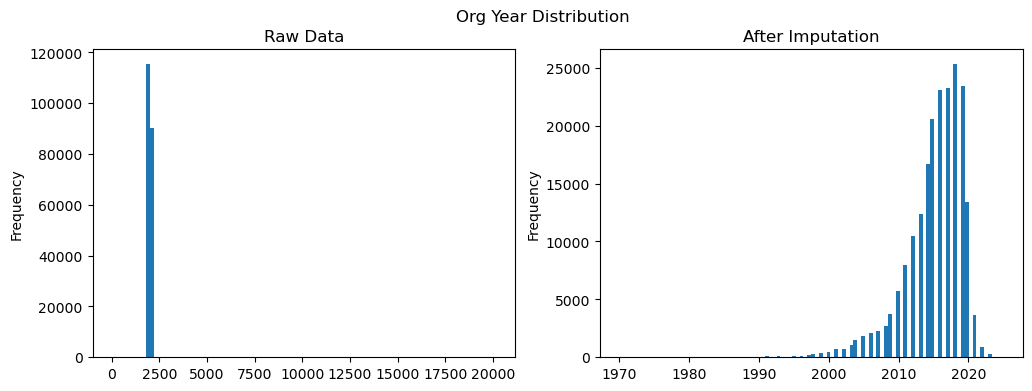

In [6]:
plt.figure(figsize=(12,4))
plt.suptitle('Org Year Distribution')
plt.subplot(1,2,1)
raw_data['orgyear'].plot(kind='hist', bins=100)
plt.title('Raw Data')
plt.subplot(1,2,2)
df['orgyear'].plot(kind='hist', bins=100)
plt.title('After Imputation')
plt.show()

In [7]:
# Handle Missing Values
df['orgyear'] = pd.to_datetime(df['orgyear'].fillna(df['orgyear'].mode()[0]), format="%Y").dt.year
print("Null Values in OrgYear: ", df['orgyear'].isnull().sum())

Null Values in OrgYear:  0


### CTC

In [67]:
# No Null values
# Outliers detected will be addressed lated

## Job Position

In [8]:
sorted(df['job_position'].dropna().unique())

[' SDE 2',
 '.',
 '..',
 '.7',
 '7',
 '7033771951',
 '737',
 '857628',
 '896651',
 '91',
 'A Group Chat Application',
 'ABAP Developer',
 'ASE',
 'ASSISTANT ENGINEER TRAINEE',
 'ASSISTANT PROFESSOR ',
 'ASSISTANT SYSTEM ENGINEER',
 'ATM Interface System',
 'Account',
 'Administrative clerk',
 'Administrator',
 'Advisor',
 'Advisory Consultant - UI/UX Expert',
 'Advisory Software Engineer',
 'Advisory System Analyat',
 'Agency collection manager',
 'Ai engineer',
 'Analyst / Software Engineer',
 'Analyst consultant',
 'Analyst programmer',
 'Analytics and Insite Devloper',
 'Android Application Developer',
 'Android Application developer',
 'Android Developer Sr Executive',
 'Android Engineer',
 'Android Facilitator',
 'Android Lead',
 'Any technical',
 'App Developer',
 'Application Developer (Frontend)',
 'Application Developer 1',
 'Application Developer 2',
 'Application Developer Analyst',
 'Application Development Analyst',
 'Application Development Associate',
 'Application Devel

#### Inference:
- Invalid occupations are observed
- Case sensitive differences
- Replace special characters with space
- Trim the text and remove double spaces
- Remove only numbers
- create categories for occupation
- Software Categories: Software, application, system, systems, IT, tech, technology, frontend, front end, backend, full stack, fullstack, cloud, computer, database, devops, firmware, app, programmer, java, developer, UI, sde, sw, se, web
- Data categories: data, analyst, analytics, business, etl, ML, machine learning, ai
- Not employed: 'no', 'none', 'not', 'null'
- other to others
- Search for non dictionary words

In [9]:
sw_cat = ['software', 'application', 'applications', 'system', 'systems', 'IT', 'tech', 'technical', 'technology', 'frontend', 'end', 'backend', 'stack', 'fullstack', 'cloud', 'computer', 'database', 'devops', 'firmware', 'app', 'programmer', 'java', 'developer', 'development', 'ui', 'sde', 'sw', 'se', 'web']
data_cat = ['data', 'analyst', 'analytics', 'business', 'etl', 'ml', 'machine', 'learning', 'ai']

In [10]:
def text_clean(text):    
    if type(text) == str:
        text = text.lower().strip()
        text = re.sub('[^A-Za-z0-9 ]+', ' ', text)
        text = text.replace("  ", " ").strip()
        text = re.sub(r'^\d+$', 'others', text)
        if text == '':
            text = 'others'
        words = text.split()
        for word in words:
            if word in ['no', 'none', 'not', 'null', 'some']:
                return "Un Employed"
    return text

In [11]:
def assign_software(text):
    if type(text) == str:
        for word in text.split():
            if word in sw_cat:
                return 1
    return 0

In [12]:
def assign_data(text):
    if type(text) == str:
        for word in text.split():
            if word in data_cat:
                return 1
    return 0

In [13]:
df['job_cleaned'] = df['job_position'].apply(text_clean)
df['software_job'] = df['job_cleaned'].apply(assign_software)
df['data_job'] = df['job_cleaned'].apply(assign_data)
df.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,job_cleaned,software_job,data_job
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016,1100000,Other,2020.0,other,0,0
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018,449999,FullStack Engineer,2019.0,fullstack engineer,1,0
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015,2000000,Backend Engineer,2020.0,backend engineer,1,0
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017,700000,Backend Engineer,2019.0,backend engineer,1,0
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017,1400000,FullStack Engineer,2019.0,fullstack engineer,1,0


In [14]:
print("Unique job positions before cleaning: ", df['job_position'].nunique())
print("Unique job positions after cleaning: ", df['job_cleaned'].nunique())

Unique job positions before cleaning:  1017
Unique job positions after cleaning:  878


In [42]:
def Encode_cat(data):
    oe = OrdinalEncoder()
    data_arr = np.array(data.dropna()).reshape(-1,1)
    data_enc = oe.fit_transform(data_arr)
    data.loc[data.notnull()] = np.squeeze(data_enc)
    return data

In [43]:
df['job_encoded'] = Encode_cat(df['job_position'])
df['company_encoded'] = Encode_cat(df['company_hash'])
df.isnull().sum()

C:\Users\Muthukumar\AppData\Local\Temp\ipykernel_22092\3507244384.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[data.notnull()] = np.squeeze(data_enc)
C:\Users\Muthukumar\AppData\Local\Temp\ipykernel_22092\3507244384.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[data.notnull()] = np.squeeze(data_enc)


company_hash           44
email_hash              0
orgyear                 0
ctc                     0
job_position        52562
ctc_updated_year        0
job_cleaned         52562
software_job            0
data_job                0
job_encoded         52562
company_encoded        44
dtype: int64

In [53]:
transformed_df = df.drop(['company_hash','email_hash', 'job_position', 'job_cleaned'], axis=1)

In [56]:
transformed_df[

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205843 entries, 0 to 205842
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   orgyear           205843 non-null  int64  
 1   ctc               205843 non-null  int64  
 2   ctc_updated_year  205843 non-null  int64  
 3   software_job      205843 non-null  int64  
 4   data_job          205843 non-null  int64  
 5   job_encoded       153281 non-null  object 
 6   company_encoded   205799 non-null  object 
 7   email_encoded     205843 non-null  float64
dtypes: float64(1), int64(5), object(2)
memory usage: 12.6+ MB


In [61]:
imputer = KNNImputer(n_neighbors=2)
impute_res = imputer.fit_transform(transformed_df.drop("job_encoded", axis=1))

In [66]:
transformed_df['company_encoded'] = impute_res[:,-2]
transformed_df.isnull().sum()

orgyear                 0
ctc                     0
ctc_updated_year        0
software_job            0
data_job                0
job_encoded         52562
company_encoded         0
email_encoded           0
dtype: int64

### CTC Updated Year

In [104]:
df.isnull().sum()

company_hash           44
email_hash              0
orgyear                 0
ctc                     0
job_position        52562
ctc_updated_year        0
job_cleaned         52562
software_job            0
data_job                0
job_enc                 0
dtype: int64

In [17]:
# df['ctc_updated_year'] = 
df['ctc_updated_year'] = pd.to_datetime(df['ctc_updated_year'], format="%Y").dt.year

# Exploratory Data Analysis
- Univariate Analysis
    - Categorical: *Frequency and Proportion Plots*
    - Numerical: *Distribution and Box plots*
    - *Skewness and Kurtosis*
- Bivariate Analysis
- Multivariate Analysis

In [79]:
cat_features = list(transformed_df.columns)
cat_features.remove('ctc')
num_features = ['ctc']

In [80]:
print(cat_features)

['orgyear', 'ctc_updated_year', 'software_job', 'data_job', 'job_encoded', 'company_encoded', 'email_encoded']


In [72]:
def univariate_plot(df, feature):
    plt.figure(figsize=(12,4))
    plt.suptitle('Univariate Analysis of ' + feature)
    plt.subplot(1,2,1)
    sns.histplot(data=df, x=feature, bins=100, kde=True) 
    plt.title("Distribution Plot")
    if feature in cat_features:
        if df[feature].nunique() <= 10:            
            plt.subplot(1,2,2)
            labels = df[feature].value_counts().index
            plt.pie(x=list(df[feature].value_counts()), labels=list(labels), autopct="%0.2f") 
            plt.title("Proportion Plot")
            plt.show()
        else:
            # Top 10 categories
            temp = df[feature].value_counts()[:10]
    else:
        plt.subplot(1,2,2)        
        plt.boxplot(df[feature])        
        plt.show()

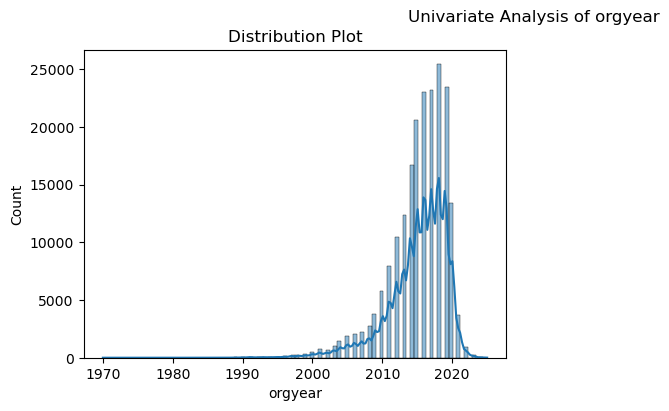

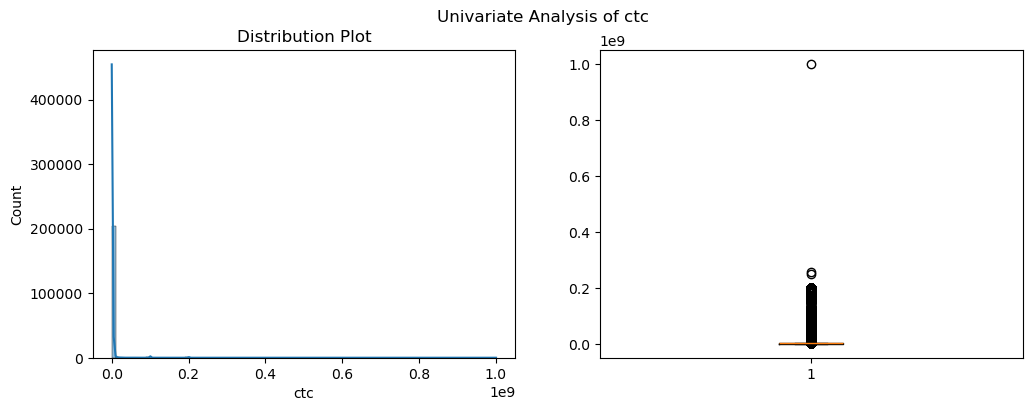

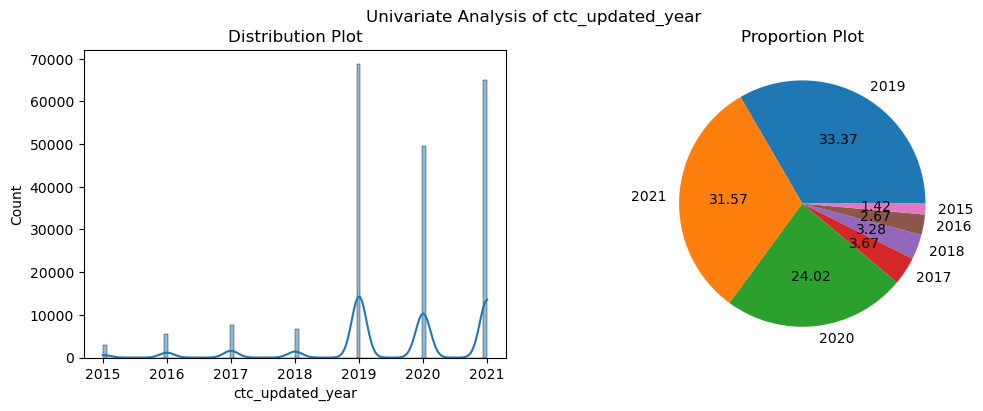

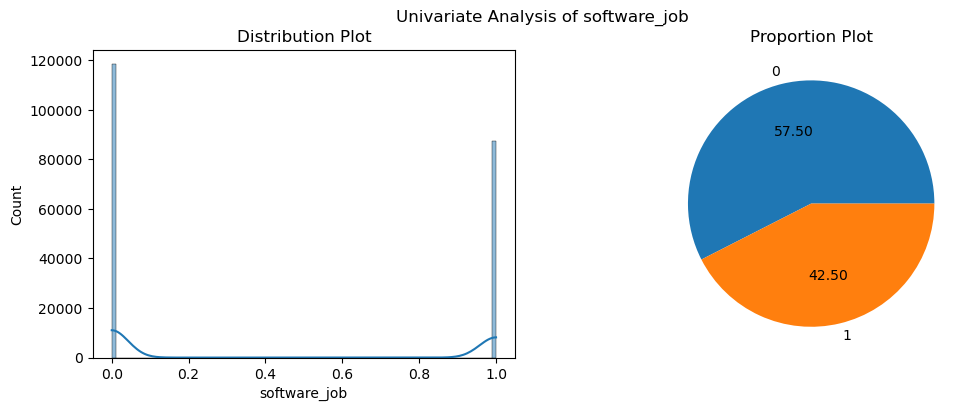

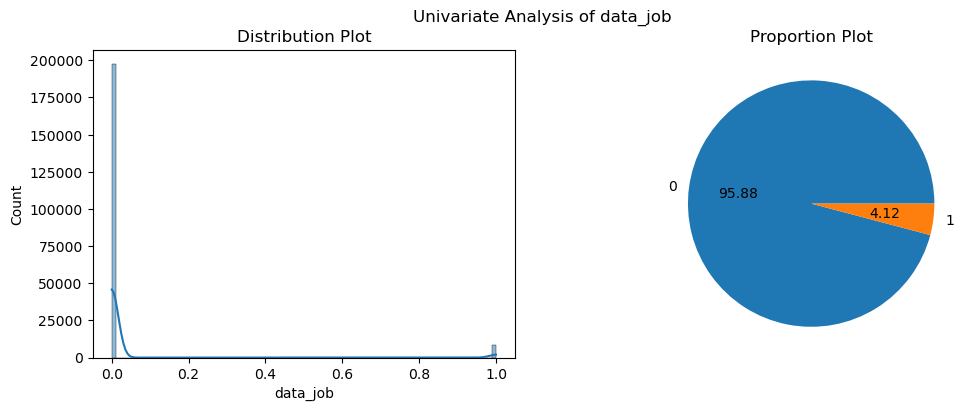

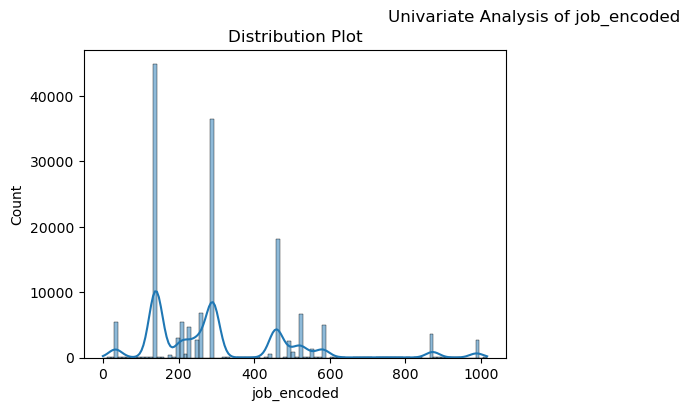

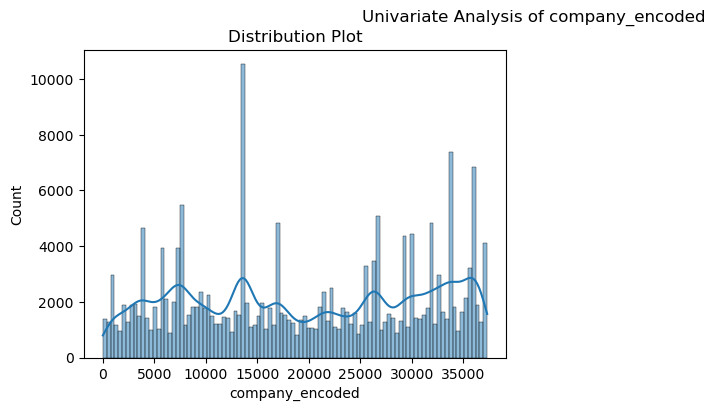

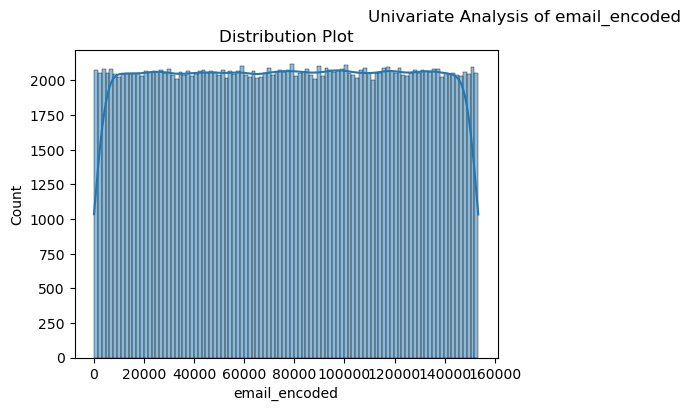

In [81]:
for feature in list(transformed_df.columns):
    univariate_plot(transformed_df, feature)

In [89]:
transformed_df['job_type'] = transformed_df[['software_job', 'data_job']].apply(cat_col, axis=1)

In [86]:
def cat_col(x):
    soft = x['software_job']
    data = x['data_job']
    
    if soft == 1 and data == 1:
       return 'Both'
    elif data == 1:
       return 'data'
    elif soft == 1:
        return 'software'
    else:
        return 'Other'

# Miscellaneous

In [190]:
raw_data.groupby('email_hash')['orgyear'].apply(list)

email_hash
00003288036a44374976948c327f246fdbdf077854690475243a9c91d3b1cf9f            [2012.0]
0000aaa0e6b61f7636af1954b43d294484cd151c9b3cf6a761391159aa77f3fa            [2013.0]
0000d58fbc18012bf6fa2605a7b0357d126ee69bc41032ace6b6223c48468887    [2021.0, 2021.0]
000120d0c8aa304fcf12ab4b85e21feb80a342cfea03d461a50a3e16626a4177            [2004.0]
00014d71a389170e668ba96ae8e1f9d991591acc8990253cc62a371eea92155b            [2009.0]
                                                                          ...       
fffc254e627e4bd1bc0ed7f01f9aebbba7c3cc56ac914ebadddd76333a7855fc            [2004.0]
fffcf97db1e9c13898f4eb4cd1c2fe862358480e104535a548f1b9daf660771c            [2015.0]
fffe7552892f8ca5fb8647d49ca805b72ea0e9538b6b015e59d649b349641174            [2014.0]
ffff49f963e4493d8bbc7cc15365423d84a767259f7200a11548e704e156d898            [2020.0]
ffffa3eb3575f43b86d986911463dce7bcadcea227e5a4b0f1756744efdb7477            [2018.0]
Name: orgyear, Length: 153443, dtype: object

In [211]:
def test(val):
    list_values = list(val)
#     return list_values
    for value in list_values:
        if math.isnan(value):
            return 1        
    return 0

In [216]:
test_data = raw_data.groupby('email_hash')['orgyear'].apply(list)

In [224]:
test_data[temp==1]

email_hash
01a284abb1ed97d72506b7a3f641b9b545e1878dfe9e5021859ab9f95b654114            [nan]
040a1f04539f587f7c656912fe42d03617f2f65b33c2aa8026dfe38ab15664b2            [nan]
060f40a7586f40c79211d1d6ba97b928d16991dfb9f4cb8cdbb2a4e19c5ced7e            [nan]
0e25bf875aaa6550db1aa9f9452179ed1cd6737c079fbc9ae3056adcee011189    [nan, 2017.0]
0f4c60c23f3161fa21002935631eeb51f3d94aaa75fee7c33937c4641799889e            [nan]
                                                                        ...      
f0e7f60ee9d43d575b80afd9b24057c303d2a2a2e0877db4c6f0304dbe88f5fe            [nan]
f7b814c6c4b821b6293ae3f9789c8839f3b0f8666b1d02917cc132315c74fd2c            [nan]
f9c1d0e623046d445a705bc39007f05619bcd37c75d3e8a9f840beda979d776d            [nan]
fadfe9dd062538ab3c2069a0d60aae2752ed0f513c79af886b5dbbd88c92c631            [nan]
fcea167cdfdb1e2f23a2733ab591e6a42bda2e5560826e18c5174d62b4f2cda5            [nan]
Name: orgyear, Length: 84, dtype: object

In [215]:
temp[temp==1]

email_hash
01a284abb1ed97d72506b7a3f641b9b545e1878dfe9e5021859ab9f95b654114    1
040a1f04539f587f7c656912fe42d03617f2f65b33c2aa8026dfe38ab15664b2    1
060f40a7586f40c79211d1d6ba97b928d16991dfb9f4cb8cdbb2a4e19c5ced7e    1
0e25bf875aaa6550db1aa9f9452179ed1cd6737c079fbc9ae3056adcee011189    1
0f4c60c23f3161fa21002935631eeb51f3d94aaa75fee7c33937c4641799889e    1
                                                                   ..
f0e7f60ee9d43d575b80afd9b24057c303d2a2a2e0877db4c6f0304dbe88f5fe    1
f7b814c6c4b821b6293ae3f9789c8839f3b0f8666b1d02917cc132315c74fd2c    1
f9c1d0e623046d445a705bc39007f05619bcd37c75d3e8a9f840beda979d776d    1
fadfe9dd062538ab3c2069a0d60aae2752ed0f513c79af886b5dbbd88c92c631    1
fcea167cdfdb1e2f23a2733ab591e6a42bda2e5560826e18c5174d62b4f2cda5    1
Name: orgyear, Length: 84, dtype: int64

## Knn Imputation for Missing Values